In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Step 1: Define your stock portfolio with stock symbols and number of shares
portfolio = {
    'TATAMOTORS.NS': 100,
    'IEX.NS': 50,
    'SAIL.NS': 75
}


In [42]:
# Step 2: Create an empty DataFrame to store stock data
portfolio_df = pd.DataFrame(columns=['Stock', 'Shares', 'Current Price', 'Total Value'])


In [43]:
# Step 3: Loop through each stock in your portfolio and fetch current data
for stock, shares in portfolio.items():
    ticker = yf.Ticker(stock)
    current_price = ticker.history(period='1d')['Close'][0]  # Get the most recent closing price

    # Add the stock data to the DataFrame using pd.concat
    portfolio_df = pd.concat([portfolio_df, pd.DataFrame([{
        'Stock': stock,
        'Shares': shares,
        'Current Price': current_price,
        'Total Value': shares * current_price
    }])], ignore_index=True)

    # Remove the extra append calls for GOOGL and MSFT - handled by the loop

<ipython-input-43-01f190090547>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = ticker.history(period='1d')['Close'][0]  # Get the most recent closing price
<ipython-input-43-01f190090547>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_df = pd.concat([portfolio_df, pd.DataFrame([{
<ipython-input-43-01f190090547>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

In [44]:
# Step 4: Display the portfolio summary
print("\nStock Portfolio:")
print(portfolio_df)



Stock Portfolio:
           Stock Shares  Current Price   Total Value
0  TATAMOTORS.NS    100     930.700012  93070.001221
1         IEX.NS     50     204.589996  10229.499817
2        SAIL.NS     75     134.029999  10052.249908


In [47]:
# Step 5: Calculate the total portfolio value
total_portfolio_value = portfolio_df['Total Value'].sum()
print(f"\nTotal Portfolio Value: INR {total_portfolio_value:.2f}")



Total Portfolio Value: INR 113351.75


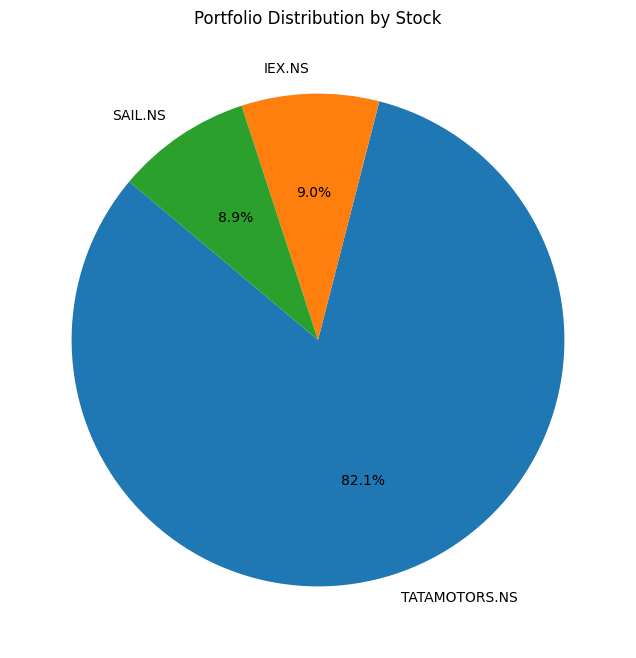

In [48]:
# Step 6: Visualize the portfolio distribution
plt.figure(figsize=(8,8))
plt.pie(portfolio_df['Total Value'], labels=portfolio_df['Stock'], autopct='%1.1f%%', startangle=140)
plt.title('Portfolio Distribution by Stock')
plt.show()

In [49]:
portfolio_df = pd.DataFrame(columns=['Stock', 'Shares', 'Current Price', 'Total Value'])


In [50]:
print("\nStock Portfolio:")
print(portfolio_df)



Stock Portfolio:
Empty DataFrame
Columns: [Stock, Shares, Current Price, Total Value]
Index: []


In [51]:
total_portfolio_value = portfolio_df['Total Value'].sum()
print(f"\nTotal Portfolio Value: ${total_portfolio_value:.2f}")



Total Portfolio Value: $0.00


In [52]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code for portfolio initialization and fetching stock data) ...

for stock, shares in portfolio.items():
    # ... (Your existing code to get stock data) ...

    # Add the stock data to the DataFrame using pd.concat
    portfolio_df = pd.concat([portfolio_df, pd.DataFrame({ # Use pd.concat to add a new row
        'Stock': [stock],  # Wrap values in lists to create a DataFrame
        'Shares': [shares],
        'Current Price': [current_price],
        'Price 5 Days Ago': [five_days_ago_price],
        '5-Day % Change': [price_change_5d],
        'Total Value': [shares * current_price]
    })], ignore_index=True)


<ipython-input-52-a03c00384d23>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_df = pd.concat([portfolio_df, pd.DataFrame({ # Use pd.concat to add a new row


In [53]:
print("\nStock Portfolio with 5-Day Price Change:")
print(portfolio_df[['Stock', 'Shares', 'Current Price', 'Price 5 Days Ago', '5-Day % Change', 'Total Value']])



Stock Portfolio with 5-Day Price Change:
           Stock Shares  Current Price  Price 5 Days Ago  5-Day % Change  \
0  TATAMOTORS.NS    100     134.029999        221.690002        2.643331   
1         IEX.NS     50     134.029999        221.690002        2.643331   
2        SAIL.NS     75     134.029999        221.690002        2.643331   

    Total Value  
0  13402.999878  
1   6701.499939  
2  10052.249908  


In [36]:
alert_threshold = 5  # Set the alert for a 5% change


In [56]:
for index, row in portfolio_df.iterrows():
    if abs(row['5-Day % Change']) > alert_threshold:
        if row['5-Day % Change'] > 0:
            print(f"Alert: {row['Stock']} increased by {row['5-Day % Change']:.2f}% in the last 5 days!")
        else:
            print(f"Alert: {row['Stock']} decreased by {row['5-Day % Change']:.2f}% in the last 5 days!")
